# 🚀 Loan Amount Prediction Using Machine Learning Models

## 📚 Introduction

Welcome to the world of loan amount prediction, where we unleash the full potential of Python and the magic of machine learning!

In this exhilarating project, we'll journey through the diverse techniques and algorithms that power the accurate prediction of loan amounts. Our adventure begins with meticulous data preprocessing, cleverly handling missing values, hand-picking the most meaningful features, and culminates in crafting formidable models that can foresee loan amounts with remarkable precision.

Whether you represent a financial institution aiming to optimize lending decisions, an individual in pursuit of insights into your loan eligibility, or an inquisitive enthusiast eager to demystify data-driven predictions, you've come to the right place. This project will empower you to make informed decisions and provide you with a profound understanding of the art of loan amount prediction.

Buckle up and join us on this thrilling journey as we combine the dynamic synergy of data, Python, and machine learning to unlock the untapped potential of loan amount prediction. Let's embark on this exciting adventure to master the craft of predictive modeling and elevate our decision-making prowess in the realm of loans!


In [379]:
# Import numpy for numerical operations
import numpy as np

# Import pandas for data manipulation and analysis
import pandas as pd

# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import seaborn for enhanced data visualization
import seaborn as sns

# Import StandardScaler and MinMaxScaler for data scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Import LabelEncoder and OneHotEncoder for encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Import train_test_split for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for linear regression modeling
from sklearn.linear_model import LinearRegression

# Import mean_squared_error, mean_absolute_error, and r2_score for regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import PolynomialFeatures for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# Import RandomForestRegressor for random forest regression modeling
from sklearn.ensemble import RandomForestRegressor


# Dataset Information

The dataset at hand is a treasure trove of valuable information, encompassing various crucial attributes that play a pivotal role in the realm of loan predictions. It offers insights into an array of factors that can significantly impact the lending process, enabling us to unlock the power of predictive modeling.

The dataset includes essential features such as:

- **Gender**: Providing insights into the gender of loan applicants.
- **Marital Status**: Shedding light on the marital status of applicants.
- **Education**: Indicating the educational background of individuals.
- **Number of Dependents**: Revealing the count of dependents associated with the applicant.
- **Income**: Offering a glimpse into the financial stability of loan seekers.
- **Loan Amount**: The focal point of our prediction, representing the desired loan amount.
- **Credit History**: A critical factor influencing loan approvals, denoting the creditworthiness of applicants.

These attributes, along with others present in the dataset, serve as the building blocks for our predictive modeling journey. By harnessing the power of this data, we aim to develop robust machine learning models that can effectively forecast loan amounts. With this newfound knowledge, we can empower financial institutions, individuals, and decision-makers to make informed choices and streamline the loan application and approval process.

As we dive deeper into the world of data analysis and machine learning, this dataset will be our guiding compass, helping us navigate through the intricate landscape of loan amount prediction.


## Loading the Dataset

[Link to the Dataset](https://drive.google.com/drive/folders/17AqAclRnF-1J5opMAh-hQm1dpb6BNqf4?usp=drive_link)


In [380]:
# Read the dataset from a CSV file and store it in a DataFrame (df)
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [381]:
#The data Set we are working with
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


* **Prediction Task**: Our primary goal in this project is to predict the output variable "Loan Amount."

* **Input Attributes**: The input features encompass a mix of categorical and numerical data. This diversity in data types requires us to employ versatile techniques to handle and analyze them effectively.

* **Attribute Analysis**: We will conduct a thorough analysis of all the attributes present in the dataset, exploring their relationships, distributions, and significance. This comprehensive exploration will provide us with valuable insights for our predictive modeling journey.


## Statistics Data Information

In [382]:
# Generate descriptive statistics for the DataFrame, which includes count, mean, standard deviation, and more.
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


* The total count column in the descriptive statistics display may reveal the presence of missing values in the dataset. These missing values will be addressed and handled in subsequent data preprocessing steps.

* The "Credit History" attributes are observed to be within the range of 0 to 1. This information is valuable as it provides insights into the nature and format of this specific attribute, which may influence how we handle it during our analysis and modeling processes.


In [383]:
# Display concise summary information about the DataFrame, including data types, non-null values, and memory usage.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


* We have a total of 13 attributes in our dataset. Out of these, 4 attributes are in floating-point format, 1 attribute is in integer format, and the remaining 8 attributes are stored as objects, which typically represent categorical data.

* While it is possible to convert object data types into more memory-efficient formats (such as category or numerical types), it's important to note that our dataset currently occupies a relatively modest 62 KB of memory. Given the dataset's size, there may not be a critical need to convert data types to reduce memory usage further at this stage.


## Preprocessing the Loan Sanction Data

In [384]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* During our data inspection, we identified the presence of NULL (missing) values in 7 columns of our dataset.

* Our next step will involve addressing these NULL values by replacing them with appropriate and common values, ensuring that our data remains complete and suitable for analysis.


In [385]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

All the missing values will be filled with the mean of the current column.

All the missing values will be filled with the most frequently occurring values.

Modes give the result in their terms of the data frame, so we only need the values. We will specify 0th index to display the values.

In [386]:
#Checking the Null Values Again
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

All the NULL values are now replaced.

## Exploratory Data Analysis

* To initiate our exploration of the dataset, let's begin by delving into the categorical column "Gender."



In [387]:

df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [388]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

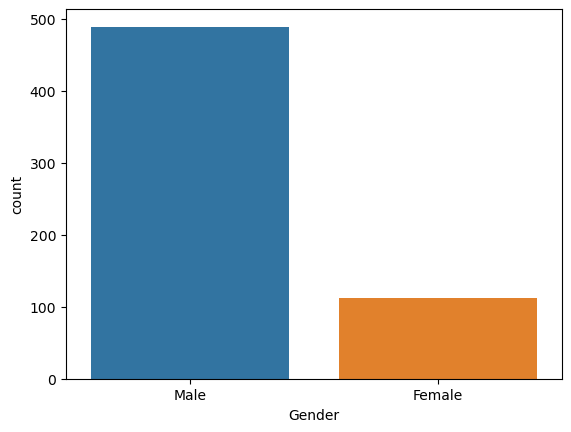

In [389]:
sns.countplot(x='Gender',data=df)  
plt.show()  

* Upon analyzing the 'Gender' attribute, we observe that the majority of the applicants are classified as male, while only a few are categorized as female. This initial insight provides valuable intuition about the distribution of gender among loan applicants.

* Such observations and intuitions gained from data exploration are fundamental in building a robust predictive model, as they allow us to understand the characteristics and trends within the dataset, which can be leveraged for making informed decisions and constructing effective models.


## To display the column "Married".

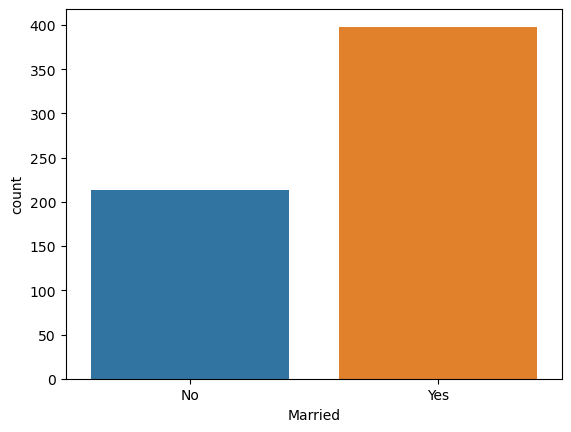

In [390]:
sns.countplot(x='Married',data=df)  
plt.show()  

* The majority of the applicants are married.

## To display the column "Dependents".

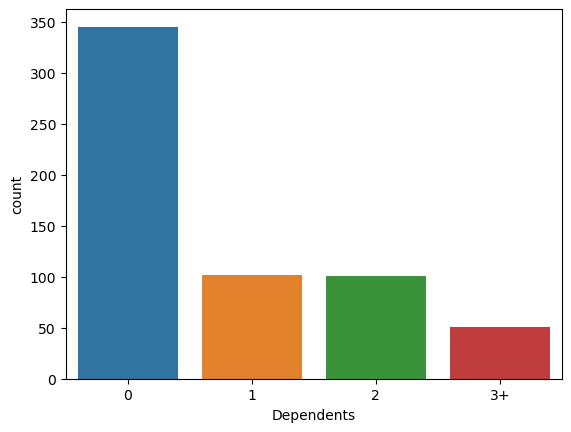

In [391]:
sns.countplot(x='Dependents',data=df)  
plt.show()  

* The majority of the applicants have zero dependents, around 100 applicants have one or two dependents and only a few have more than three dependents.

## To display the column "Education".

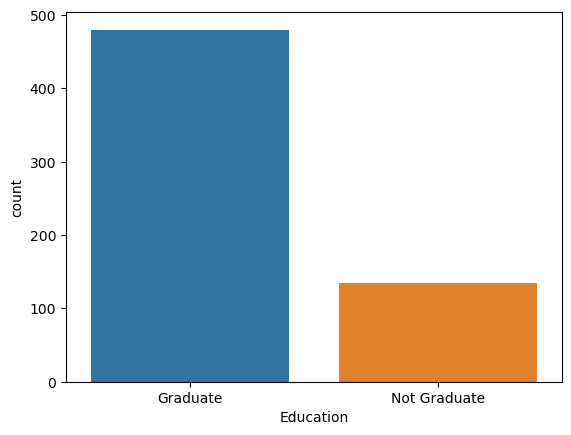

In [392]:
sns.countplot(x='Education',data=df)  
plt.show()  

* Majority of people are Graduated

## To display the column "Self Employed".

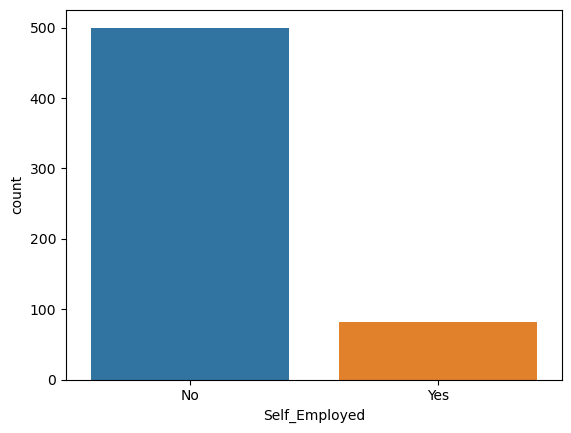

In [393]:
sns.countplot(x='Self_Employed',data=df)  
plt.show()  

* Around 90 applicants are either freelancers or run a business.

## To display the column "Property Area".

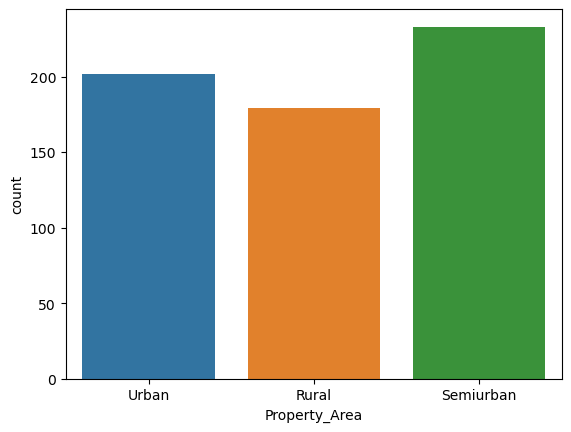

In [394]:
sns.countplot(x='Property_Area',data=df)  
plt.show()  

* We can assume that the applicants are equally distributed in urban, rural and semi-urban areas.


## To display the column "Loan Status".

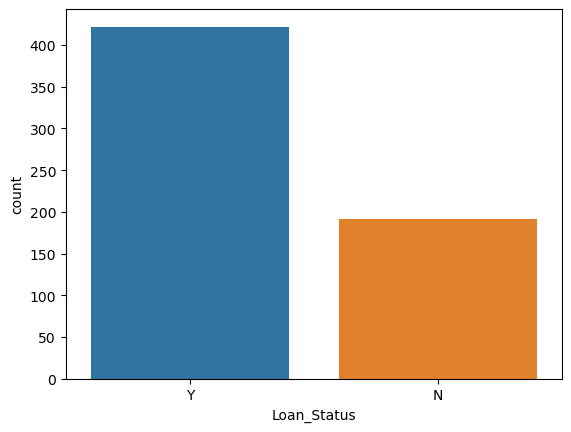

In [395]:
sns.countplot(x='Loan_Status',data=df)  
plt.show()  

* Around 400 loans are accepted and 200 loans are rejected. Its shows the 2:1 ratio.

## Let us first explore the Numerical column "Applicant Income".

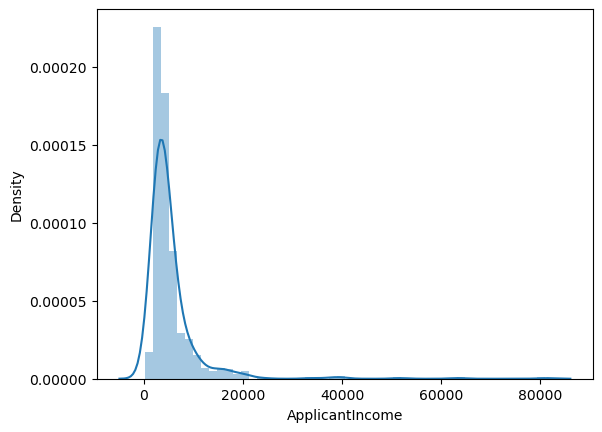

In [396]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])
plt.show()

* The data are skewed left in the graph, which is not a suitable distribution to train a Model.

* Hence, we will apply the Log Transformation later to normalize the attributes in the form of Bell Curve (Normal Distribution).

## To display the column "Co-applicant Income".

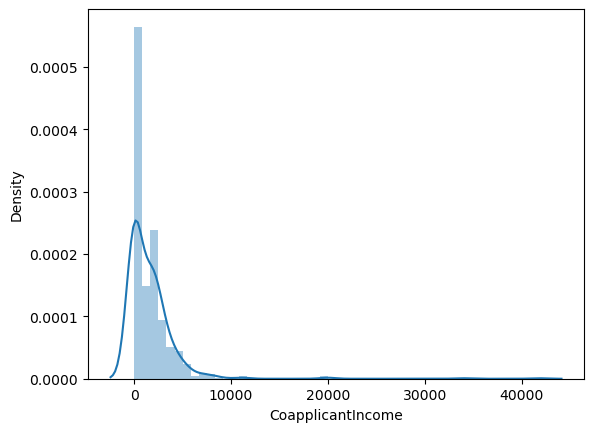

In [397]:
sns.distplot(df["CoapplicantIncome"])
plt.show()

## To display the column "Loan Amount".

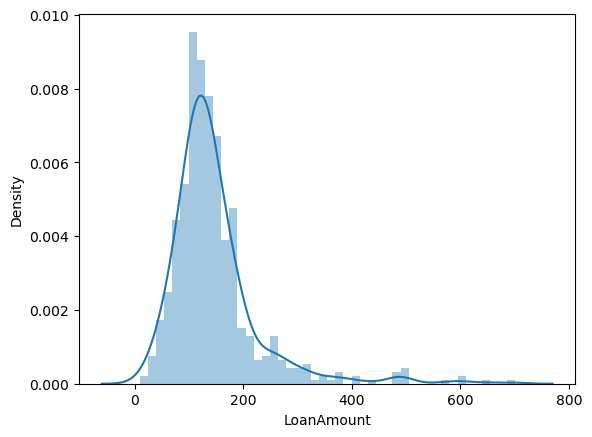

In [398]:
sns.distplot(df["LoanAmount"])
plt.show()

##  To display the column "Loan Amount Term".

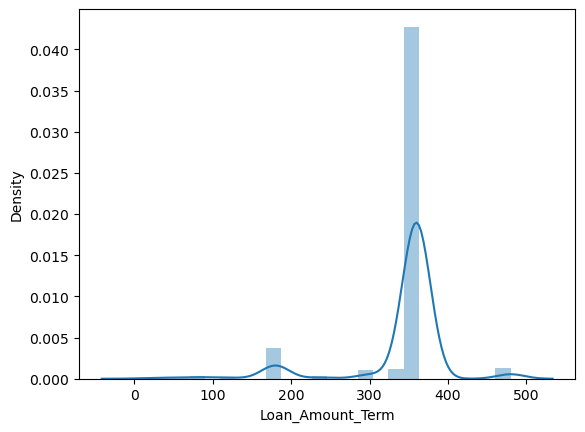

In [399]:
sns.distplot(df['Loan_Amount_Term'])
plt.show()

## To display the column "Credit History".



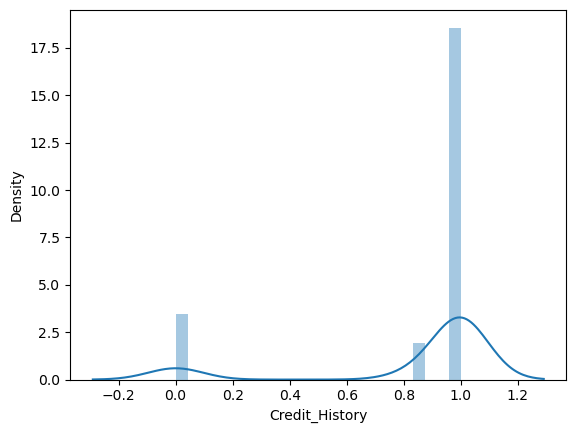

In [400]:
sns.distplot(df['Credit_History'])
plt.show()

## Log Transformation

* Log transformation is a valuable technique that can be employed to mitigate the effects of highly skewed data distributions, making them less skewed. Instead of directly altering the existing columns, we will create new columns to house the log-transformed data. These new columns will be distinguished by adding the term 'Log' after the original column name.

* This approach allows us to maintain the integrity of the original data while providing us with transformed versions for analysis and modeling. It is a prudent strategy to handle skewed data and derive additional insights from our dataset.


In [401]:
# Log transformation of numerical features
#numerical_cols = ["ApplicantIncome", "CoapplicantIncome", "Loan_Amount_Term", "Credit_History"]
#df[numerical_cols] = np.log1p(df[numerical_cols])  # Apply log transformation

# Correlation Matrix

In this project, we will utilize a correlation matrix to uncover the relationships and dependencies among the numerical attributes within our dataset. The correlation matrix is a powerful tool for exploring how different attributes are related, and it can provide insights into which variables have a significant impact on the target variable, such as 'Loan Amount.'

This analysis will aid in understanding the strength and direction of linear relationships between numerical attributes, helping us make informed decisions and refine our predictive modeling process.


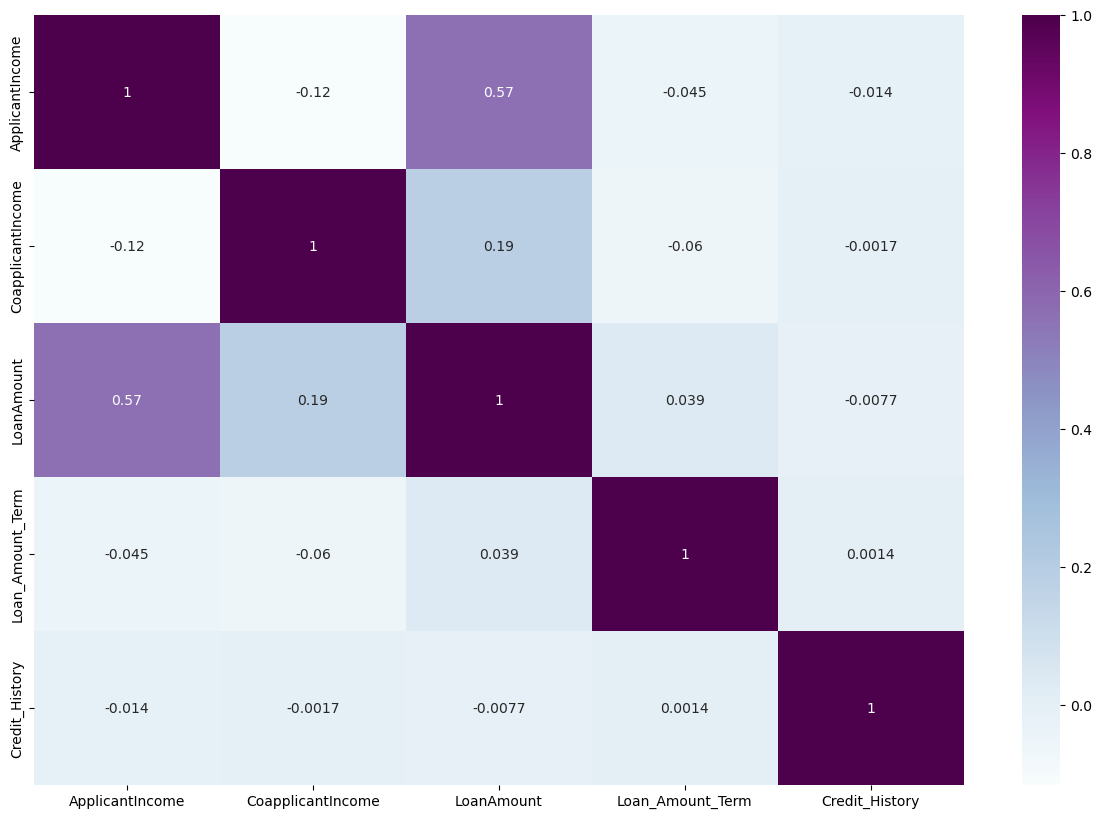

In [402]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")
plt.show()

* In this graph, the higher density is plotted with dark color and the lower density is plotted with light color.

* We need to remove the highly correlated attributes. 

* It means the original attributes are correlated with log attributes.

* We will remove the previous attributes and keep the log attributes to train our model.

In [403]:
# Display the first few rows of the DataFrame to get an initial glimpse of the data
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


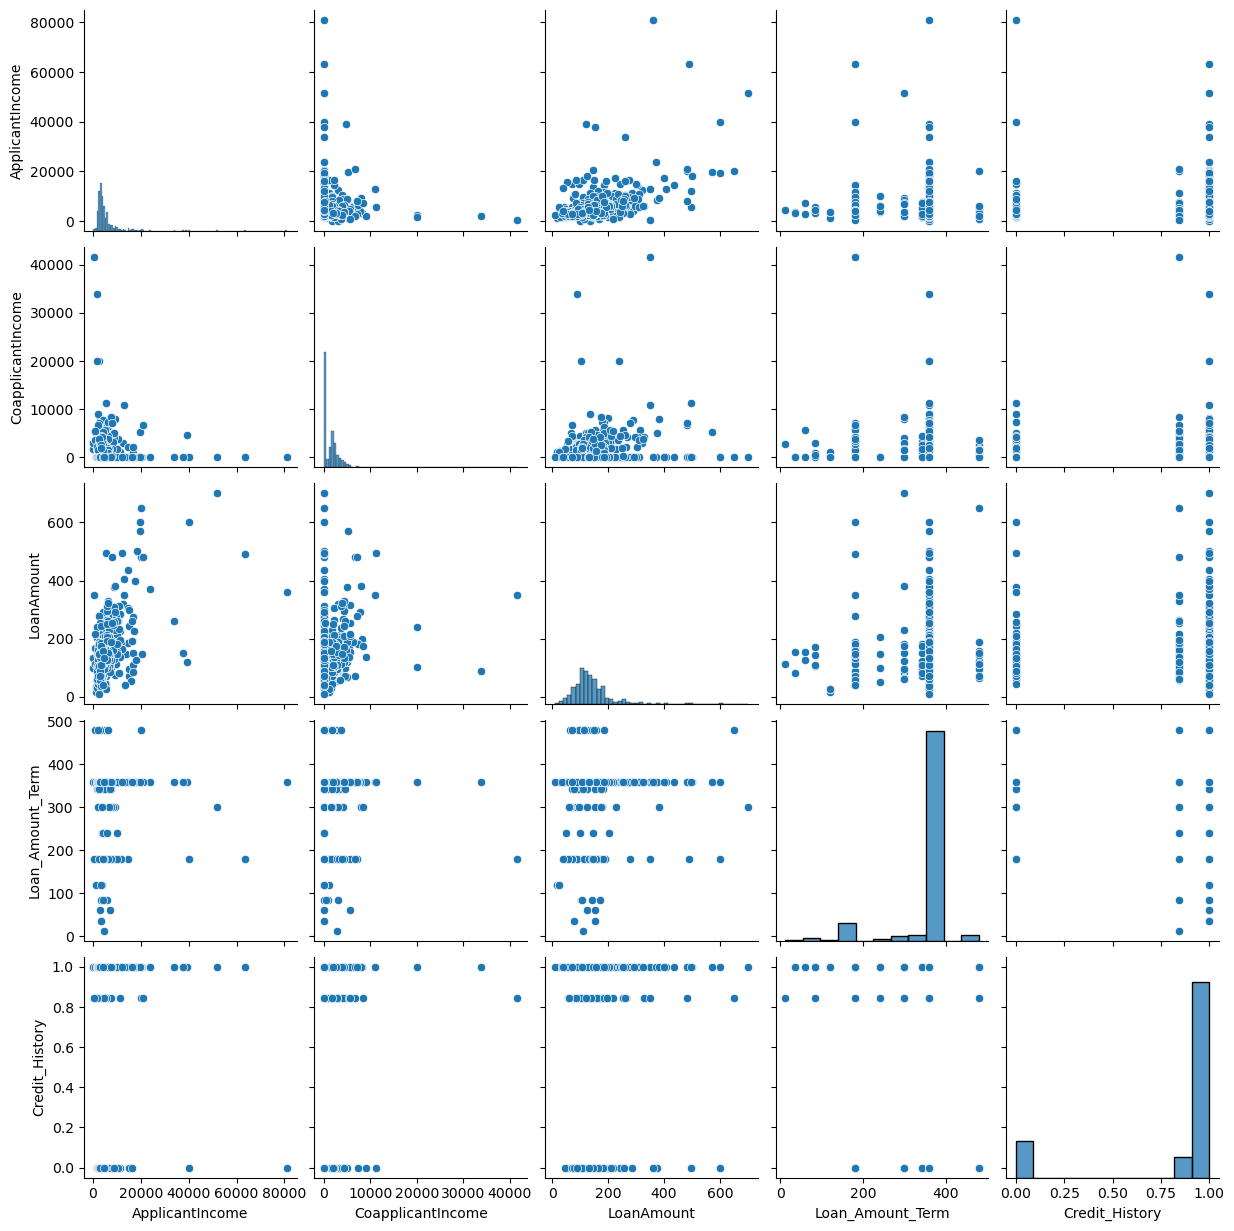

In [404]:
# Create a pairplot to visualize relationships between numerical attributes
sns.pairplot(df)
plt.show()


# Label Encoding

In this project, we will employ label encoding as a technique to convert categorical columns into numerical representations. Label encoding is a valuable method that assigns unique numerical labels to each category within a categorical column. This transformation allows us to work with categorical data in machine learning models that require numerical input.

By converting categorical attributes into numerical ones, we expand our capability to leverage these features for predictive modeling, thereby enhancing the overall quality of our analysis.


In [405]:
# Label Encoding for Categorical Columns
# Instantiate a LabelEncoder
encoder = LabelEncoder()

# List of categorical columns to be label-encoded
categorical_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]

# Apply label encoding to each categorical column in the DataFrame
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [406]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y


* All the values of the dataset are now in numerical format. It will help us to train our model easily.

* For example Gender 1 indicates 'Male' and 0 indicates 'Female'.



In [407]:
# Feature Scaling: Standardization and Min-Max Scaling
# Instantiate a StandardScaler and a MinMaxScaler
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# List of numerical columns to be scaled
numerical_cols = ["ApplicantIncome", "CoapplicantIncome", "Loan_Amount_Term", "Credit_History"]

# Apply standardization and min-max scaling to each numerical column in the DataFrame
df[numerical_cols] = min_max_scaler.fit_transform(scaler.fit_transform(df[numerical_cols]))


In [408]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.070489,0.000000,146.412162,0.74359,1.0,2,Y
1,LP001003,1,1,1,0,0,0.054830,0.036192,128.000000,0.74359,1.0,0,N
2,LP001005,1,1,0,0,1,0.035250,0.000000,66.000000,0.74359,1.0,2,Y
3,LP001006,1,1,0,1,0,0.030093,0.056592,120.000000,0.74359,1.0,2,Y
4,LP001008,1,0,0,0,0,0.072356,0.000000,141.000000,0.74359,1.0,2,Y


## Splitting the data for Training and Testing

* Before training and testing, we have to specify the input and output attributes.

In [409]:
# Splitting the Data into Training and Testing Sets
# Features (X) and target variable (y)
X = df.drop(["Loan_ID", "LoanAmount", "Loan_Status"], axis=1)
y = df["LoanAmount"]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training

## Linear Regression

In [410]:
# Creating and Training a Linear Regression Model
linear_model = LinearRegression()  # Instantiate a Linear Regression model
model = linear_model.fit(X_train, y_train)  # Fit the model to the training data


In [411]:
# Making Predictions on the Test Data
linear_prediction = linear_model.predict(X_test)  # Use the trained model to make predictions on the test data

In [440]:
# Calculating Regression Metrics
linear_mse = mean_squared_error(y_test, linear_prediction)  # Calculate Mean Squared Error (MSE)
linear_mae = mean_absolute_error(y_test, linear_prediction)  # Calculate Mean Absolute Error (MAE)
linear_r2 = r2_score(y_test, linear_prediction)  # Calculate R-squared (R2) score

In [441]:
# Displaying Regression Metrics for Linear Regression Model
print("Linear Regression:")
print(f"Mean Squared Error: {linear_mse}")  # Display MSE
print(f"Mean Absolute Error: {linear_mae}")  # Display MAE
print(f"R-squared (R2) Score: {linear_r2}")  # Display R2 score

Linear Regression:
Mean Squared Error: 2608.0176444372432
Mean Absolute Error: 37.287515077866054
R-squared (R2) Score: 0.5209385325151856


# Multiple Linear regression

In [414]:
multiple_linear_model = LinearRegression()
multiple_linear_model.fit(X_train, y_train)

LinearRegression()

In [442]:
multi_prediction = multiple_linear_model.predict(X_test)
multi_mse = mean_squared_error(y_test, multi_prediction)
multi_mae = mean_absolute_error(y_test, multi_prediction)
multi_r2 = r2_score(y_test, multi_prediction)

In [443]:
print("Multiple Linear Regression:")
print(f"Mean Squared Error: {multi_mse}")
print(f"Mean Absolute Error: {multi_mae}")
print(f"R-squared (R2) Score: {multi_r2}")

Multiple Linear Regression:
Mean Squared Error: 2608.0176444372432
Mean Absolute Error: 37.287515077866054
R-squared (R2) Score: 0.5209385325151856


In [444]:
new_data = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [445]:
new_data = new_data.drop(['LoanAmount'], axis=1)

In [446]:
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,360.0,1.0,Rural


In [447]:

# Preprocess the new data (follow the same preprocessing steps as the training data)
# fill the missing values for numerical terms - mean
new_data['Loan_Amount_Term'] = new_data['Loan_Amount_Term'].fillna(new_data['Loan_Amount_Term'].mean())
new_data['Credit_History'] = new_data['Credit_History'].fillna(new_data['Credit_History'].mean())

# fill the missing values for categorical terms - mode
new_data['Gender'] = new_data["Gender"].fillna(new_data['Gender'].mode()[0])
new_data['Married'] = new_data["Married"].fillna(new_data['Married'].mode()[0])
new_data['Dependents'] = new_data["Dependents"].fillna(new_data['Dependents'].mode()[0])
new_data['Self_Employed'] = new_data["Self_Employed"].fillna(new_data['Self_Employed'].mode()[0])
encoder = LabelEncoder()



In [448]:
new_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [449]:
# List of categorical columns to be label-encoded
categorical_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]

# Apply label encoding to each categorical column in the DataFrame
for col in categorical_cols:
    new_data[col] = encoder.fit_transform(new_data[col])



In [450]:
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,360.0,1.000000,2
1,LP001022,1,1,1,0,0,3076,1500,360.0,1.000000,2
2,LP001031,1,1,2,0,0,5000,1800,360.0,1.000000,2
3,LP001035,1,1,2,0,0,2340,2546,360.0,0.825444,2
4,LP001051,1,0,0,1,0,3276,0,360.0,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777,360.0,1.000000,2
363,LP002975,1,1,0,0,0,4158,709,360.0,1.000000,2
364,LP002980,1,0,0,0,0,3250,1993,360.0,0.825444,1
365,LP002986,1,1,0,0,0,5000,2393,360.0,1.000000,0


In [451]:
new_data[numerical_cols] = scaler.transform(new_data[numerical_cols])  # Scale and normalize numerical features

In [452]:
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,0.051857,-0.554487,0.279851,0.451640,2
1,LP001022,1,1,1,0,0,-0.381297,-0.041468,0.279851,0.451640,2
2,LP001031,1,1,2,0,0,-0.066097,0.061136,0.279851,0.451640,2
3,LP001035,1,1,2,0,0,-0.501872,0.316278,0.279851,-0.047954,2
4,LP001051,1,0,0,1,0,-0.348532,-0.554487,0.279851,0.451640,2
...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,-0.228448,0.053270,0.279851,0.451640,2
363,LP002975,1,1,0,0,0,-0.204038,-0.312000,0.279851,0.451640,2
364,LP002980,1,0,0,0,0,-0.352791,0.127145,0.279851,-0.047954,1
365,LP002986,1,1,0,0,0,-0.066097,0.263950,0.279851,0.451640,0


In [453]:
new_data_predictions = linear_model.predict(new_data.drop(["Loan_ID"], axis=1))

In [454]:
result_df = pd.concat([new_data, pd.Series(new_data_predictions, name='PredictedLoanAmount')], axis=1)
print(result_df)

      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0    LP001015       1        1           0          0              0   
1    LP001022       1        1           1          0              0   
2    LP001031       1        1           2          0              0   
3    LP001035       1        1           2          0              0   
4    LP001051       1        0           0          1              0   
..        ...     ...      ...         ...        ...            ...   
362  LP002971       1        1           3          1              1   
363  LP002975       1        1           0          0              0   
364  LP002980       1        0           0          0              0   
365  LP002986       1        1           0          0              0   
366  LP002989       1        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
0           0.051857          -0.554487          0.279851 

# polynomial Regresssion

In [428]:
# Create Polynomial Features
# You can adjust the degree as needed
poly_features = PolynomialFeatures(degree=2)

# Transform the training features with polynomial features
X_train_poly = poly_features.fit_transform(X_train)

# Transform the testing features with the same polynomial features
X_test_poly = poly_features.transform(X_test)


In [429]:
# Creating and Training a Polynomial Regression Model
polynomial_model = LinearRegression()  # Instantiate a Linear Regression model
polynomial_model.fit(X_train_poly, y_train)  # Fit the model to the polynomial features of the training data


LinearRegression()

In [455]:
# Making Predictions and Calculating Regression Metrics for Polynomial Regression Model
poly_prediction = polynomial_model.predict(X_test_poly)  # Use the polynomial regression model to make predictions on the test data
poly_mse = mean_squared_error(y_test, poly_prediction)  # Calculate Mean Squared Error (MSE)
poly_mae = mean_absolute_error(y_test,poly_prediction )  # Calculate Mean Absolute Error (MAE)
poly_r2 = r2_score(y_test, poly_prediction)  # Calculate R-squared (R2) score


In [456]:
# Displaying Regression Metrics for Polynomial Regression Model
print("Polynomial Regression:")
print(f"Mean Squared Error: {poly_mse}")  # Display MSE
print(f"Mean Absolute Error: {poly_mae}")  # Display MAE
print(f"R-squared (R2) Score: {poly_r2}")  # Display R2 score


Polynomial Regression:
Mean Squared Error: 11557.959421658668
Mean Absolute Error: 46.0533653413905
R-squared (R2) Score: -1.123058106404991


In [457]:
new_data_poly = poly_features.transform(new_data.drop("Loan_ID", axis=1))

# Make predictions on new data
new_data_predictions = polynomial_model.predict(new_data_poly)

# Display the new data along with predictions
result_df = pd.concat([new_data, pd.Series(new_data_predictions, name='PredictedLoanAmount')], axis=1)
print(result_df)

      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0    LP001015       1        1           0          0              0   
1    LP001022       1        1           1          0              0   
2    LP001031       1        1           2          0              0   
3    LP001035       1        1           2          0              0   
4    LP001051       1        0           0          1              0   
..        ...     ...      ...         ...        ...            ...   
362  LP002971       1        1           3          1              1   
363  LP002975       1        1           0          0              0   
364  LP002980       1        0           0          0              0   
365  LP002986       1        1           0          0              0   
366  LP002989       1        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
0           0.051857          -0.554487          0.279851 

## Random Forest Regression

In [433]:
# Creating a Random Forest Regression Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [434]:
# Fitting the Random Forest Regression Model to the Training Data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [458]:
# Making Predictions and Calculating Regression Metrics for the Random Forest Regression Model
forest_prediction = model.predict(X_test)  # Use the Random Forest model to make predictions on the test data
forest_mse = mean_squared_error(y_test, forest_prediction)  # Calculate Mean Squared Error (MSE)
forest_mae = mean_absolute_error(y_test, forest_prediction)  # Calculate Mean Absolute Error (MAE)
forest_r2 = r2_score(y_test, forest_prediction)  # Calculate R-squared (R2) score

# Display the calculated regression metrics
print(f"Mean Squared Error: {forest_mse}")
print(f"Mean Absolute Error: {forest_mae}")
print(f"R-squared (R2) Score: {forest_r2}")

Mean Squared Error: 3627.162287157481
Mean Absolute Error: 36.88795030396249
R-squared (R2) Score: 0.33373392170198124


In [459]:
# Extract and Display Feature Importance from the Random Forest Model
feature_importance = model.feature_importances_

# Display feature importances for each feature
print("Feature Importance:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importance[i]}")


Feature Importance:
Gender: 0.018014562824776845
Married: 0.012551354188444531
Dependents: 0.03726939751298421
Education: 0.005303646376334041
Self_Employed: 0.020474684802838924
ApplicantIncome: 0.654532047473419
CoapplicantIncome: 0.15995290738666848
Loan_Amount_Term: 0.03227429032496247
Credit_History: 0.012465499061517577
Property_Area: 0.04716161004805378


In [460]:
new_data_predictions = model.predict(new_data.drop(["Loan_ID"], axis=1))

# Display the new data along with predictions
result_df = pd.concat([new_data, pd.Series(new_data_predictions, name='PredictedLoanAmount')], axis=1)
print(result_df)

      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0    LP001015       1        1           0          0              0   
1    LP001022       1        1           1          0              0   
2    LP001031       1        1           2          0              0   
3    LP001035       1        1           2          0              0   
4    LP001051       1        0           0          1              0   
..        ...     ...      ...         ...        ...            ...   
362  LP002971       1        1           3          1              1   
363  LP002975       1        1           0          0              0   
364  LP002980       1        0           0          0              0   
365  LP002986       1        1           0          0              0   
366  LP002989       1        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
0           0.051857          -0.554487          0.279851 

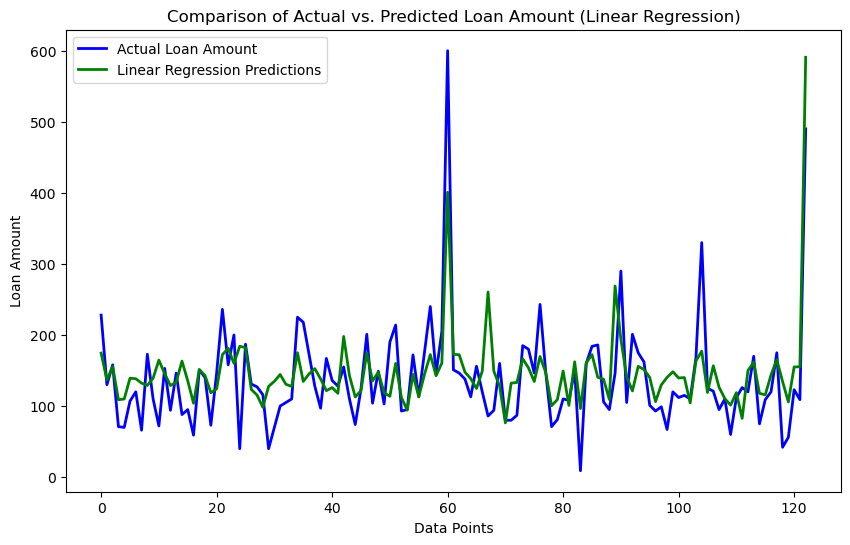

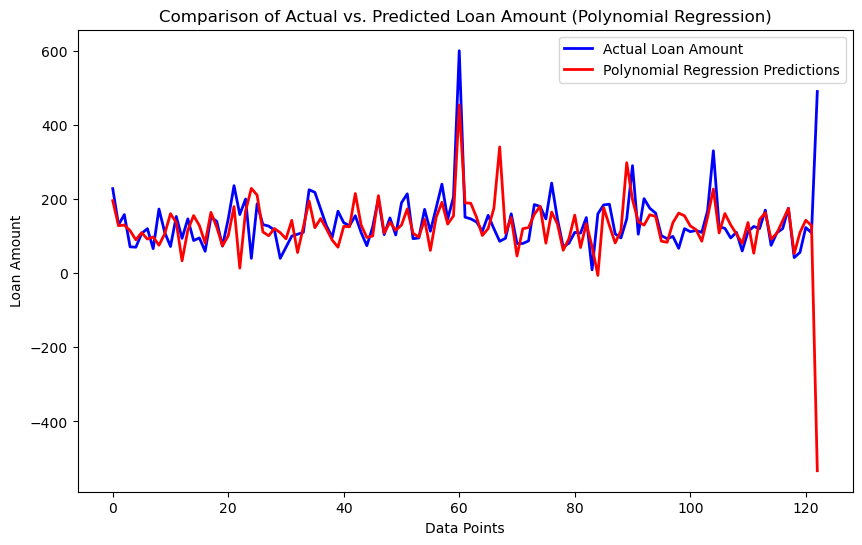

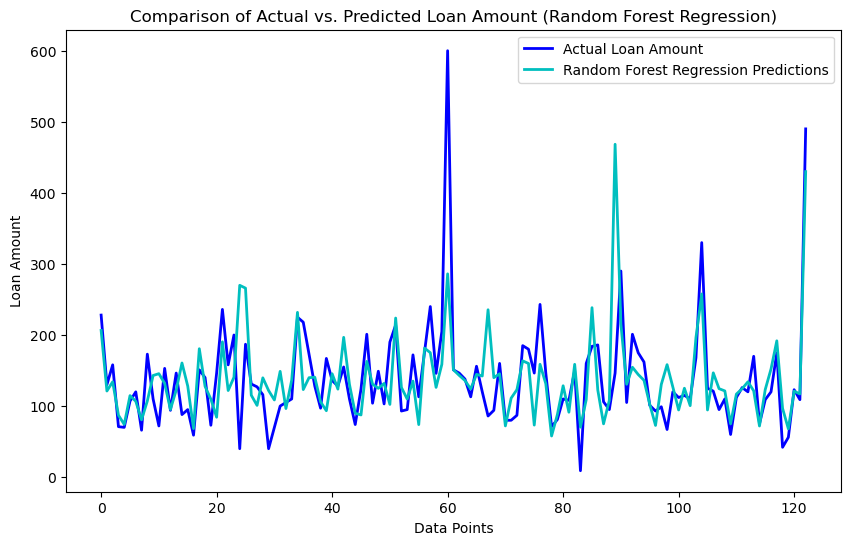

In [461]:
import matplotlib.pyplot as plt

# Create a range of values to represent the x-axis (e.g., data points)
x_values = range(len(y_test))

# Create a line graph for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_test, 'b-', label="Actual Loan Amount", linewidth=2)
plt.plot(x_values, linear_prediction, 'g-', label="Linear Regression Predictions", linewidth=2)
plt.xlabel("Data Points")
plt.ylabel("Loan Amount")
plt.title("Comparison of Actual vs. Predicted Loan Amount (Linear Regression)")
plt.legend(loc='best')
plt.show()

# Create a line graph for Polynomial Regression
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_test, 'b-', label="Actual Loan Amount", linewidth=2)
plt.plot(x_values, poly_prediction, 'r-', label="Polynomial Regression Predictions", linewidth=2)
plt.xlabel("Data Points")
plt.ylabel("Loan Amount")
plt.title("Comparison of Actual vs. Predicted Loan Amount (Polynomial Regression)")
plt.legend(loc='best')
plt.show()

# Create a line graph for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_test, 'b-', label="Actual Loan Amount", linewidth=2)
plt.plot(x_values, forest_prediction, 'c-', label="Random Forest Regression Predictions", linewidth=2)
plt.xlabel("Data Points")
plt.ylabel("Loan Amount")
plt.title("Comparison of Actual vs. Predicted Loan Amount (Random Forest Regression)")
plt.legend(loc='best')
plt.show()


## Model Selection for Loan Amount Prediction

When selecting the best model for loan amount prediction, several factors come into play, including the nature of the dataset, the problem's complexity, and the choice of evaluation criteria. In general, it's crucial to evaluate models using key metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) score. Lower MSE and MAE values and a higher R2 score typically indicate better model performance.

### Model Comparison

Let's briefly compare the three models we've explored for loan amount prediction:

#### Linear Regression:

- **Pros**: Simplicity, interpretability, and computational efficiency.
- **Cons**: Assumes a linear relationship between features and the target variable, which may not capture complex patterns.
- **Best Use Case**: When the relationship is primarily linear.

#### Polynomial Regression:

- **Pros**: Can capture nonlinear relationships using polynomial terms.
- **Cons**: Complexity and potential overfitting with high polynomial degrees.
- **Best Use Case**: When the relationship is nonlinear and polynomial terms can better explain the data.

#### Random Forest Regression:

- **Pros**: Versatile for handling complex, nonlinear relationships, high-dimensional data, and feature interactions. Helps mitigate overfitting.
- **Cons**: More complex and challenging to interpret.
- **Best Use Case**: When the relationship is complex, and a combination of linear and nonlinear patterns is present.

### Model Selection Steps

To determine the best model for loan amount prediction, we can follow these steps:

1. Split the dataset into training and testing sets.
2. Train each of the three models on the training data.
3. Evaluate the models using appropriate metrics (MSE, MAE, R2 score) on the testing data.
4. Choose the model with the lowest MSE and MAE and the highest R2 score.

These steps will help us make an informed decision about the most suitable model for our specific loan amount prediction problem.

Remember that model selection should be based on a combination of performance metrics, problem requirements, and the interpretability of the chosen model.


In [463]:
models = {
    "Linear Regression": (linear_mse, linear_mae, linear_r2),
    "Polynomial Regression": (poly_mse, poly_mae, poly_r2),
    "Random Forest Regression": (forest_mse, forest_mae, forest_r2)
}

best_model = min(models, key=lambda model: (models[model][0], models[model][1], -models[model][2]))
print("Best Model:", best_model)
print("Mean Squared Error:", models[best_model][0])
print("Mean Absolute Error:", models[best_model][1])
print("R-squared (R2) Score:", models[best_model][2])

Best Model: Linear Regression
Mean Squared Error: 2608.0176444372432
Mean Absolute Error: 37.287515077866054
R-squared (R2) Score: 0.5209385325151856


In [468]:
import pandas as pd

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Random Forest Regression'],
    'Mean Squared Error (MSE)': [linear_mse,poly_mse, forest_mse],
    'Mean Absolute Error (MAE)': [linear_mae,poly_mae, forest_mae],
    'R-squared (R2) Score': [linear_r2,poly_r2, forest_r2]
})

# Display the results DataFrame
print(results)


                      Model  Mean Squared Error (MSE)  \
0         Linear Regression               2608.017644   
1     Polynomial Regression              11557.959422   
2  Random Forest Regression               3627.162287   

   Mean Absolute Error (MAE)  R-squared (R2) Score  
0                  37.287515              0.520939  
1                  46.053365             -1.123058  
2                  36.887950              0.333734  


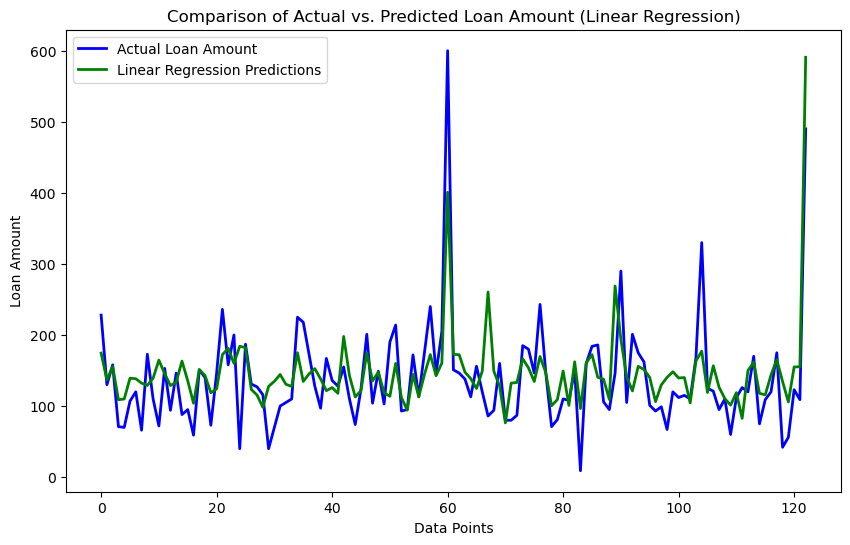

In [469]:
import matplotlib.pyplot as plt

# Create a line graph for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_test, 'b-', label="Actual Loan Amount", linewidth=2)
plt.plot(x_values, linear_prediction, 'g-', label="Linear Regression Predictions", linewidth=2)
plt.xlabel("Data Points")
plt.ylabel("Loan Amount")
plt.title("Comparison of Actual vs. Predicted Loan Amount (Linear Regression)")
plt.legend(loc='best')
plt.show()

# Create similar graphs for Polynomial Regression and Random Forest Regression


In [470]:
# Display actual and predicted values for Linear Regression
print("Linear Regression - Actual vs. Predicted:")
for i, (actual, predicted) in enumerate(zip(y_test, linear_prediction)):
    print(f"Data Point {i}: Actual = {actual}, Predicted = {predicted}")

# Repeat this for Polynomial Regression and Random Forest Regression


Linear Regression - Actual vs. Predicted:
Data Point 0: Actual = 228.0, Predicted = 174.51262525421777
Data Point 1: Actual = 130.0, Predicted = 136.95131092683414
Data Point 2: Actual = 158.0, Predicted = 155.53253594578376
Data Point 3: Actual = 71.0, Predicted = 108.84660533902168
Data Point 4: Actual = 70.0, Predicted = 109.9590283035866
Data Point 5: Actual = 107.0, Predicted = 139.189890961373
Data Point 6: Actual = 120.0, Predicted = 138.44593021543108
Data Point 7: Actual = 66.0, Predicted = 132.23118793164815
Data Point 8: Actual = 173.0, Predicted = 129.0519514434763
Data Point 9: Actual = 110.0, Predicted = 139.20624434933364
Data Point 10: Actual = 72.0, Predicted = 164.63950804434788
Data Point 11: Actual = 153.0, Predicted = 145.63822541065701
Data Point 12: Actual = 94.0, Predicted = 128.89458005083085
Data Point 13: Actual = 146.41216216216216, Predicted = 133.63249791867986
Data Point 14: Actual = 88.0, Predicted = 163.2389129902494
Data Point 15: Actual = 95.0, Predic